Univerzitet u Sarajevu

Elektrotehnički fakultet

#### **Dubinska analiza podataka**

# Laboratorijska vježba 9. - Klasifikacija Teksta Koristeći Metode Dubinskog Učenja

---

Izrada laboratorijske vježbe vrši se u ovom *Jupyter Notebook*-u. Isti je potrebno konvertovati u PDF dokument i predati na email adresu ekrupalija1@etf.unsa.ba.

Ime i prezime studenta, broj indeksa:

Haris Masovic, 1689/17993

Datum izrade izvještaja:

23.05.2021

**Za pomoć pri izradi izvještaja koristiti materijale za rad na predmetu *Predavanje 9*.**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


----

### Zadatak 1. - Učitavanje *dataseta*

U okviru ovog zadatka potrebno je izvršiti učitavanje svih prethodno formiranih prezentacija *dataseta* u varijable koje će se iskoristiti za klasifikaciju teksta.

**Zadatak:**
    
> Preuzeti *dataset* koji se nalazi na [sljedećem linku](https://drive.google.com/file/d/1jpLVnCHZB68DBKv_gDsUaLFDPefEWEz6/view?usp=sharing).
>
> *Dataset* ima sljedeći oblik:
>
> ![](https://docs.google.com/uc?export=download&id=1TArmNDDqr_Od4mHSyMVw1nOfYu3UbxhL)
>
> Potrebno je učitati sve kolone iz *dataseta*.
>
> Ispisati cijeli *dataset* ili prvi red podataka nakon učitavanja.

In [2]:
import pandas

path_to_csv = "/content/drive/MyDrive/dap-lab9/"

full_economic_news_df = pandas.read_csv(path_to_csv + "Full-Economic-News-DFE-839861.csv")

full_economic_news_df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/2015 17:48:27,3.0,0.6400,yes,0.6400,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/2015 16:54:25,NaN,NaN,no,1.0000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/2015 01:59:03,NaN,NaN,no,1.0000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/2015 02:19:39,NaN,0.0000,no,0.6750,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/2015 17:48:27,3.0,0.3257,yes,0.6400,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,830985632,False,finalized,3,11/17/2015 18:16:29,7.0,0.3511,yes,0.6641,wapo_152454634,1952-02-11,"Sawyer Sees Strong Economy For 2 Years, Truce ...",NaN,NaN,Secretary of Commerce Charles W. Sawyer said y...
7996,830985633,False,finalized,3,11/18/2015 08:10:02,NaN,NaN,no,1.0000,wapo_410349039,2009-12-13,Oil's losses are airlines' gains,NaN,NaN,"U.S. stocks inched up last week, overcoming co..."
7997,830985634,False,finalized,3,11/18/2015 12:12:00,NaN,NaN,no,1.0000,wapo_410346237,2009-12-18,Full Senate to vote on Bernanke; PANEL ADVANCE...,NaN,NaN,Ben S. Bernanke cleared a key hurdle Thursday ...
7998,830985635,False,finalized,3,11/18/2015 07:17:44,NaN,0.0000,no,0.6855,wapo_307808606,1995-01-10,Reinventing Opportunities,NaN,NaN,The White House's push to contract out many fe...


**Zadatak:**
    
> Preuzeti *dataset* koji se nalazi na [sljedećem linku](https://drive.google.com/file/d/1ExLtx9kKHdaBg2lBG1lmLVLQiyS9oh8P/view?usp=sharing).
>
> *Dataset* ima sljedeći oblik:
>
> ![](https://docs.google.com/uc?export=download&id=1rslXJQSyF5ND9xTK89q63qt9ZqrB3i1i)
>
> Potrebno je učitati sve kolone iz *dataseta*. Voditi računa o tome da se podaci ne učitaju kao jedan veliki string, nego kao lista float varijabli, na isti način na koji su bili reprezentirani prije spašavanja u *file* u prethodnim laboratorijskim vježbama.
>
> Kako ne sadrže svi redovi isti broj varijabli (zbog varijabilne dužine i različitog broja riječi), pri formiranju <code>DataFrame</code> objekta doći će do pojave velikog broja NaN vrijednosti. Te vrijednosti potrebno je pretvoriti u 0, korištenjem <code>numpy</code> biblioteke ili na drugi željeni način.
>
> Ispisati cijeli *dataset* ili prvi red podataka nakon učitavanja.

In [3]:
import ast
import numpy as np

# ucitavanje dataseta
cbow_representation_df = pandas.read_csv(path_to_csv + "cbow_representation.csv")

cbow_representation_df['original_tokens'] = cbow_representation_df['original_tokens'].apply(lambda x: ast.literal_eval(x))

data_float = []
for row in cbow_representation_df['vector_cbow']:
    floats = row.split(" ")
    row_of_floats = []
    for f in floats:
        row_of_floats.append(float(f))
    
    data_float.append(row_of_floats)


data_float = pandas.DataFrame(data_float)
data_float = data_float.replace(np.nan, 0)

# ispisivanje dataseta
data_float


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4750,4751,4752,4753,4754,4755,4756,4757,4758,4759,4760,4761,4762,4763,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773,4774,4775,4776,4777,4778,4779,4780,4781,4782,4783,4784,4785,4786,4787,4788,4789
0,1.284636,0.652393,-2.405397,2.669240,3.965975,3.469808,3.324732,2.170538,-2.391253,4.441098,1.284636,0.652393,-2.405397,2.669240,3.965975,3.469808,3.324732,2.170538,-2.391253,4.441098,1.650084,-6.494556,-4.387665,-2.437482,-4.027659,-9.843685,-1.521189,6.273397,-0.847346,6.389258,1.650084,-6.494556,-4.387665,-2.437482,-4.027659,-9.843685,-1.521189,6.273397,-0.847346,6.389258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.385507,0.294450,-1.660104,1.720707,-0.566837,-1.797949,2.821771,2.456715,-1.114054,3.344746,-0.385507,0.294450,-1.660104,1.720707,-0.566837,-1.797949,2.821771,2.456715,-1.114054,3.344746,-0.385507,0.294450,-1.660104,1.720707,-0.566837,-1.797949,2.821771,2.456715,-1.114054,3.344746,-4.285338,-2.566572,-2.721272,1.060466,-1.342107,-3.791157,-4.267499,-1.604124,-2.700957,9.397190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.231812,-0.681910,-1.859726,0.406435,1.973416,-2.743707,2.524849,-0.505982,-0.476066,3.692495,-1.079705,1.138343,-1.428930,2.004181,0.528427,-2.991364,1.559202,2.432396,-1.957070,2.212273,-1.423961,0.623235,-0.400766,-2.770990,-0.189297,-0.638085,4.501299,0.761166,-2.941585,2.350682,-1.423961,0.623235,-0.400766,-2.770990,-0.189297,-0.638085,4.501299,0.761166,-2.941585,2.350682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.385507,0.294450,-1.660104,1.720707,-0.566837,-1.797949,2.821771,2.456715,-1.114054,3.344746,-0.385507,0.294450,-1.660104,1.720707,-0.566837,-1.797949,2.821771,2.456715,-1.114054,3.344746,-0.385507,0.294450,-1.660104,1.720707,-0.566837,-1.797949,2.821771,2.456715,-1.114054,3.344746,-1.707319,-0.153519,-1.740621,1.877497,0.968782,-3.199626,3.178267,-0.790824,0.106983,3.397945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.284636,0.652393,-2.405397,2.669240,3.965975,3.469808,3.324732,2.170538,-2.391253,4.441098,1.284636,0.652393,-2.405397,2.669240,3.965975,3.469808,3.324732,2.170538,-2.391253,4.441098,1.284636,0.652393,-2.405397,2.669240,3.965975,3.469808,3.324732,2.170538,-2.391253,4.441098,1.284636,0.652393,-2.405397,2.669240,3.965975,3.469808,3.324732,2.170538,-2.391253,4.441098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.676480,-4.300832,0.133499,-1.545591,4.453439,-2.310340,5.071320,-0.738893,1.063919,6.754840,-1.018491,-0.624528,-2.475693,4.199625,1.074303,-4.687655,5.531223,-0.020581,0.135256,4.526173,-1.277399,-2.668886,-1.446241,-1.238744,3.168825,-1.204686,1.646368,0.228665,-0.915976,2.234641,-1.256765,-2.238027,-1.231871,-1.956277,3.970164,-1.308272,2.173005,0.470640,-0.637385,2.287953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,-0.353666,0.581364,-1.517663,1.078529,-1.718577,-0.947948,3.724285,0.335286,-2.91

**Zadatak:**

> Izvršiti kreiranje dvije vrste ulaznih i izlaznih podataka na sličan način kao u prethodnoj laboratorijskoj vježbi.
>
> Kako modeli dubinskog učenja kao izlazne varijable generišu brojeve, potrebno je da izlazni skup podataka sadrži labele mapirane kako slijedi: <code>no -> 0, yes -> 1, maybe -> 2</code>.
>
> Formirati trening, validacijske i testne skupove podataka. Koristiti distribuciju 60% - 20% - 20% podataka. Kreirati dvije vrste skupova:
>
> 1. Originalni tekst koji je vektoriziran (kolona <code>text</code> iz prvog učitanog *dataseta* pri uputstvu iz predavanja);
>
> 2. Skalirani podaci (<code>vector_cbow</code> kolona iz drugog učitanog *dataseta* pretvorena u numeričke vrijednosti i skalirana tako da nema negativnih vrijednosti).
>
> Zbog nemogućnosti rada sa negativnim brojevima za neke modele dubinskog učenja, neskalirani podaci neće biti korišteni u ovoj laboratorijskoj vježbi.
>
> Neuralne mreže kao ulaz očekuju liste listi. Iz tog razloga nad podacima je potrebno izvršiti funkciju <code>tolist()</code>.
>
> Dodatno je neophodno sačuvati podatke o broju kolona (za dvije vrste skupova su različite) kako bi se ti podaci mogli koristiti u nastavku laboratorijske vježbe.

In [4]:
from string import punctuation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

vector_cbow_scaled = data_float.copy()

vector_cbow_scaled = scaler.fit_transform(vector_cbow_scaled)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words="english", max_features=1000)

y = full_economic_news_df['relevance']

label_mapping = {
    "no": 0,
    "yes": 1,
    "not sure": 2
}

y = [label_mapping[i] for i in y]

y_train = y[0:4800]
y_validation = y[4800:6400]
y_test = y[6400:8000]

data_as_lists = vect.fit_transform(full_economic_news_df['text']).toarray().tolist()

vector_cbow_scaled_data_as_lists = vector_cbow_scaled.tolist()

text_train = data_as_lists[0:4800]
text_validation = data_as_lists[4800:6400]
text_test = data_as_lists[6400:8000]

vector_cbow_scaled_train = vector_cbow_scaled_data_as_lists[0:4800]
vector_cbow_scaled_validation = vector_cbow_scaled_data_as_lists[4800:6400]
vector_cbow_scaled_test = vector_cbow_scaled_data_as_lists[6400:8000]

----

### Zadatak 2. - CNN (Konvolucijske Neuralne Mreže)

U okviru ovog zadatka potrebno je izvršiti treniranje konvolucijske neuralne mreže koristeći prethodno učitane podatke.

**NAPOMENA**: Zbog dužeg trajanja procesa i veće potrošnje memorije, preporučuje se da se ova laboratorijska vježba radi u okruženju koje podržava GPU paralelizaciju ili online na platformi [Google Colab](http:colab.research.google.com).

**Zadatak:**
    
> Formirati <code>Embedding</code> sloj neuralne mreže. Može se iskoristiti kod koji je prikazan ispod, pri čemu je <code>col1</code> potrebno zamijeniti sa brojem kolona za prvi skup podataka, a <code>col2</code> sa brojem kolona za drugi skup podataka.

In [6]:
from tensorflow.keras.layers import Embedding

num_words = 57000
EMBEDDING_DIM = 8
MAX_SEQUENCE_LENGTH1 = len(text_train[0])
MAX_SEQUENCE_LENGTH2 = len(vector_cbow_scaled_train[0])

embedding_layer1 = Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH1)

embedding_layer2 = Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH2)

**Zadatak:**
    
> Izvršiti kod koji je prikazan ispod kako bi se definisala struktura neuralne mreže.

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
import numpy as np

cnnmodel = Sequential()
cnnmodel.add(embedding_layer1)
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(1, activation='softmax'))

In [8]:
cnnmodel2 = Sequential()
cnnmodel2.add(embedding_layer2)
cnnmodel2.add(Conv1D(128, 5, activation='relu'))
cnnmodel2.add(MaxPooling1D(5))
cnnmodel2.add(Conv1D(128, 5, activation='relu'))
cnnmodel2.add(MaxPooling1D(5))
cnnmodel2.add(Conv1D(128, 5, activation='relu'))
cnnmodel2.add(GlobalMaxPooling1D())
cnnmodel2.add(Dense(128, activation='relu'))
cnnmodel2.add(Dense(1, activation='softmax'))

**Zadatak:**
    
> Izvršiti kod koji je prikazan ispod, pri čemu je potrebno nepoznate vrijednosti zamijeniti sa trening, validacijskim i testnim ulaznim i izlaznim podskupovima podataka.
>
> Voditi računa o tome da se ovaj programski kod treba dvaput izvršiti za dva različita skupa podataka - vektorizirani i skalirani, učitani u prvom zadatku.
>
> Informacije o treniranju trebaju se sačuvati u varijablu <code>history</code> koja će se koristiti u nastavku laboratorijske vježbe, kao i informacije o tačnosti klasifikacije sačuvane u varijablama <code>score</code> i <code>acc</code>.
>
> Sve informacije trebaju se sačuvati u zasebne varijable kako bi se u nastavku mogle koristiti.

In [9]:
cnnmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history_text_1 = cnnmodel.fit(text_train, y_train, batch_size=256, epochs=10, validation_data=(text_validation, y_validation), verbose=1)
score, acc_text_1 = cnnmodel.evaluate(text_test, y_test)

print('Text test accuracy with CNN:', acc_text_1)

cnnmodel2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history_cbow_1 = cnnmodel2.fit(vector_cbow_scaled_train, y_train, batch_size=256, epochs=10, validation_data=(vector_cbow_scaled_validation, y_validation), verbose=1)
score, acc_cbow_1 = cnnmodel2.evaluate(vector_cbow_scaled_test, y_test)

print('Cbow test accuracy with CNN:', acc_cbow_1)

Epoch 1/10
19/19 [==============================] - 39s 329ms/step - loss: 0.5783 - acc: 0.2149 - val_loss: 0.4063 - val_acc: 0.1156
Epoch 2/10
19/19 [==============================] - 1s 46ms/step - loss: 0.5228 - acc: 0.2106 - val_loss: 0.3638 - val_acc: 0.1156
Epoch 3/10
19/19 [==============================] - 1s 46ms/step - loss: 0.5360 - acc: 0.2179 - val_loss: 0.3654 - val_acc: 0.1156
Epoch 4/10
19/19 [==============================] - 1s 46ms/step - loss: 0.5428 - acc: 0.2208 - val_loss: 0.4049 - val_acc: 0.1156
Epoch 5/10
19/19 [==============================] - 1s 46ms/step - loss: 0.5348 - acc: 0.2216 - val_loss: 0.4343 - val_acc: 0.1156
Epoch 6/10
19/19 [==============================] - 1s 47ms/step - loss: 0.5249 - acc: 0.2159 - val_loss: 0.3822 - val_acc: 0.1156
Epoch 7/10
19/19 [==============================] - 1s 47ms/step - loss: 0.5171 - acc: 0.2066 - val_loss: 0.3844 - val_acc: 0.1156
Epoch 8/10
19/19 [==============================] - 1s 47ms/step - loss: 0.5287 -

**Zadatak:**
    
> Ponoviti treniranje barem 3 puta (po 3 puta za oba skupa podataka), pritom mijenjajući vrijednosti parametara <code>loss, optimizer, epochs</code>.

In [10]:
cnnmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history_text_2 = cnnmodel.fit(text_train, y_train, batch_size=256, epochs=20, validation_data=(text_validation, y_validation), verbose=1)
score, acc_text_2 = cnnmodel.evaluate(text_test, y_test)

print('Text test accuracy with CNN, epochs: 20:', acc_text_2)

cnnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history_text_3 = cnnmodel.fit(text_train, y_train, batch_size=256, epochs=10, validation_data=(text_validation, y_validation), verbose=1)
score, acc_text_3 = cnnmodel.evaluate(text_test, y_test)

print('Text test accuracy with CNN, optimizer: adam:', acc_text_3)

cnnmodel.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['acc'])
history_text_4 = cnnmodel.fit(text_train, y_train, batch_size=256, epochs=10, validation_data=(text_validation, y_validation), verbose=1)
score, acc_text_4 = cnnmodel.evaluate(text_test, y_test)

print('Text test accuracy with CNN, loss: mean_squared_error:', acc_text_4)

Epoch 1/20
19/19 [==============================] - 6s 266ms/step - loss: 0.5319 - acc: 0.2194 - val_loss: 0.3588 - val_acc: 0.1156
Epoch 2/20
19/19 [==============================] - 1s 49ms/step - loss: 0.5372 - acc: 0.2205 - val_loss: 0.3696 - val_acc: 0.1156
Epoch 3/20
19/19 [==============================] - 1s 47ms/step - loss: 0.5113 - acc: 0.2143 - val_loss: 0.3760 - val_acc: 0.1156
Epoch 4/20
19/19 [==============================] - 1s 47ms/step - loss: 0.5119 - acc: 0.2164 - val_loss: 0.3665 - val_acc: 0.1156
Epoch 5/20
19/19 [==============================] - 1s 47ms/step - loss: 0.5046 - acc: 0.2159 - val_loss: 0.3915 - val_acc: 0.1156
Epoch 6/20
19/19 [==============================] - 1s 46ms/step - loss: 0.5053 - acc: 0.2183 - val_loss: 0.3802 - val_acc: 0.1156
Epoch 7/20
19/19 [==============================] - 1s 46ms/step - loss: 0.4992 - acc: 0.2216 - val_loss: 0.3822 - val_acc: 0.1156
Epoch 8/20
19/19 [==============================] - 1s 47ms/step - loss: 0.4876 - 

In [11]:
cnnmodel2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history_cbow_2 = cnnmodel2.fit(vector_cbow_scaled_train, y_train, batch_size=256, epochs=20, validation_data=(vector_cbow_scaled_validation, y_validation), verbose=1)
score, acc_cbow_2 = cnnmodel2.evaluate(vector_cbow_scaled_test, y_test)

print('Cbow test accuracy with CNN, epochs: 20:', acc_cbow_2)

cnnmodel2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history_cbow_3 = cnnmodel2.fit(vector_cbow_scaled_train, y_train, batch_size=256, epochs=10, validation_data=(vector_cbow_scaled_validation, y_validation), verbose=1)
score, acc_cbow_3 = cnnmodel2.evaluate(vector_cbow_scaled_test, y_test)

print('Cbow test accuracy with CNN, optimizer: adam:', acc_cbow_3)

cnnmodel2.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['acc'])
history_cbow_4 = cnnmodel2.fit(vector_cbow_scaled_train, y_train, batch_size=256, epochs=10, validation_data=(vector_cbow_scaled_validation, y_validation), verbose=1)
score, acc_cbow_4 = cnnmodel2.evaluate(vector_cbow_scaled_test, y_test)

print('Cbow test accuracy with CNN, loss: mean_squared_error:', acc_cbow_4)

Epoch 1/20
19/19 [==============================] - 22s 1s/step - loss: 0.5331 - acc: 0.2107 - val_loss: 0.3842 - val_acc: 0.1156
Epoch 2/20
19/19 [==============================] - 4s 198ms/step - loss: 0.5336 - acc: 0.2214 - val_loss: 0.3690 - val_acc: 0.1156
Epoch 3/20
19/19 [==============================] - 4s 198ms/step - loss: 0.5265 - acc: 0.2129 - val_loss: 0.4213 - val_acc: 0.1156
Epoch 4/20
19/19 [==============================] - 4s 199ms/step - loss: 0.5138 - acc: 0.2033 - val_loss: 0.3836 - val_acc: 0.1156
Epoch 5/20
19/19 [==============================] - 4s 199ms/step - loss: 0.5229 - acc: 0.2120 - val_loss: 0.4133 - val_acc: 0.1156
Epoch 6/20
19/19 [==============================] - 4s 199ms/step - loss: 0.5253 - acc: 0.2130 - val_loss: 0.3925 - val_acc: 0.1156
Epoch 7/20
19/19 [==============================] - 4s 201ms/step - loss: 0.5199 - acc: 0.2116 - val_loss: 0.3693 - val_acc: 0.1156
Epoch 8/20
19/19 [==============================] - 4s 200ms/step - loss: 0.52

**Zadatak:**
    
> Za sve dobivene rezultate izvršiti programski kod, u okviru kojeg se vrši vizualizacija dobivenih rezultata.

In [12]:
import matplotlib.pyplot as plt

def print_rez(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

History text 1:


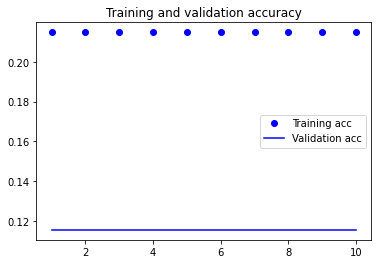

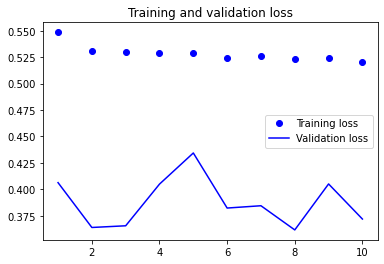

History text 2:


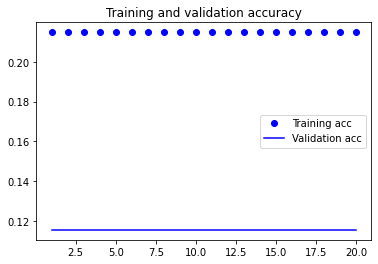

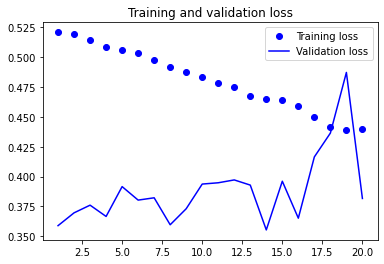

History text 3:


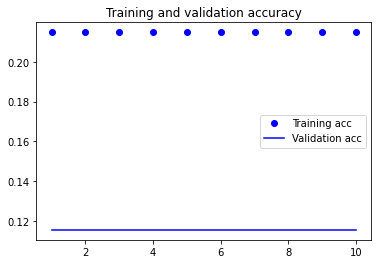

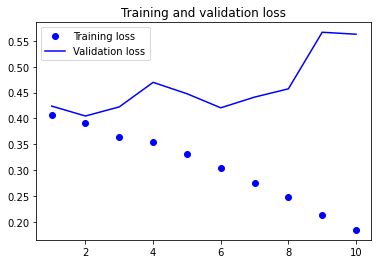

History text 4:


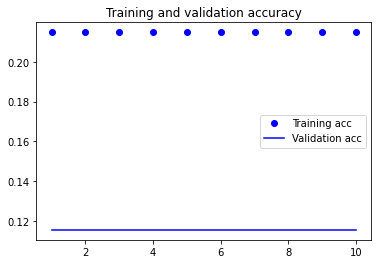

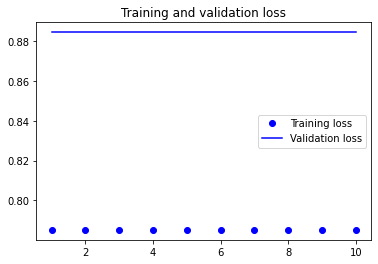


History cbow 1:


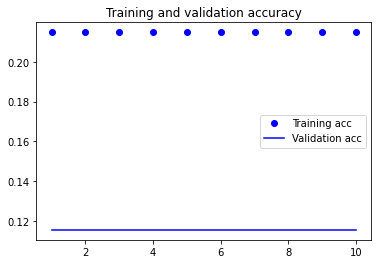

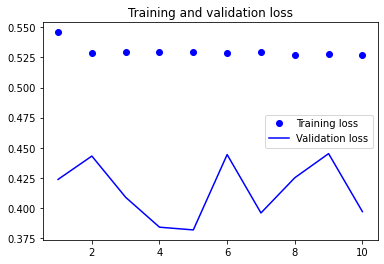

History cbow 2:


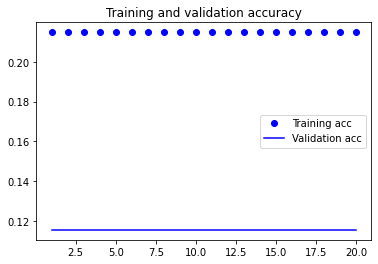

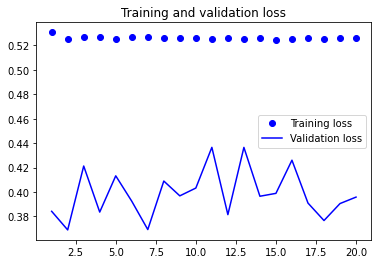

History cbow 3:


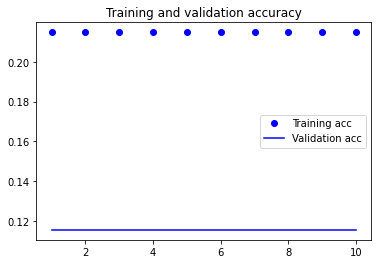

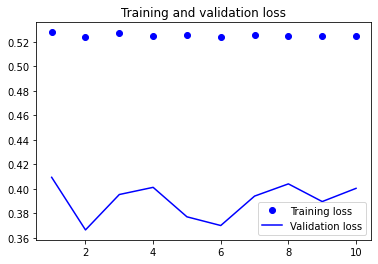

History cbow 4:


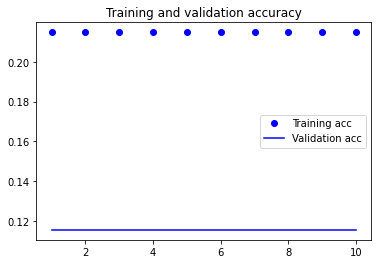

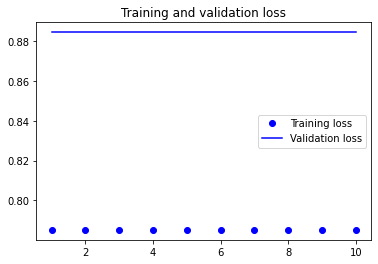

In [13]:
print('History text 1:')
print_rez(history_text_1)
print('History text 2:')
print_rez(history_text_2)
print('History text 3:')
print_rez(history_text_3)
print('History text 4:')
print_rez(history_text_4)

print('')
print('History cbow 1:')
print_rez(history_cbow_1)
print('History cbow 2:')
print_rez(history_cbow_2)
print('History cbow 3:')
print_rez(history_cbow_3)
print('History cbow 4:')
print_rez(history_cbow_4)

**Zadatak:**
    
> Izvršiti analizu svih prethodno dobivenih rezultata. Šta se može zaključiti o različitim vrijednostima parametara i reprezentacijama podataka? Detaljno objasniti sve dobivene rezultate, prikaze i tačnosti nad testnim skupovima podataka.

- Razlicite vrijednosti parametara se ne razlikuju toliko u postignutim rezultatima.
- Razlike se ocituju u velicini lossa i preciznoscu nad train/validacijskim setom podataka, dok za testni set se dobijaju isti rezultati.
- Razlog predstavlja veliki overfitting nad ovim datasetom, te razlicite reprezentacije podataka ne igraju toliku ulogu (text or cbow).

----

### Zadatak 3. - LSTM RNN (*Long-Short Term Memory* Rekurentne Neuralne Mreže)

U okviru ovog zadatka potrebno je izvršiti treniranje regresijske neuralne mreže koristeći prethodno učitane podatke.

**NAPOMENA**: Zbog dužeg trajanja procesa i veće potrošnje memorije, preporučuje se da se ova laboratorijska vježba radi u okruženju koje podržava GPU paralelizaciju ili online na platformi [Google Colab](http:colab.research.google.com).

**Zadatak:**
    
> Izvršiti kod koji je prikazan ispod kako bi se definisala struktura neuralne mreže.

In [7]:
# smanjenje dataseta i postavki da bi se resursi zadovoljili
y_train = y[0:400]
y_validation = y[400:600]
y_test = y[600:800]

text_train = data_as_lists[0:400]
text_validation = data_as_lists[400:600]
text_test = data_as_lists[600:800]

vector_cbow_scaled_train = vector_cbow_scaled_data_as_lists[0:400]
vector_cbow_scaled_validation = vector_cbow_scaled_data_as_lists[400:600]
vector_cbow_scaled_test = vector_cbow_scaled_data_as_lists[600:800]

In [8]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
import numpy as np


rnnmodel = Sequential()
rnnmodel.add(embedding_layer1)
rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel.add(Dense(1, activation='sigmoid'))

In [9]:
rnnmodel2 = Sequential()
rnnmodel2.add(embedding_layer2)
rnnmodel2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel2.add(Dense(1, activation='sigmoid'))

**Zadatak:**
    
> Izvršiti kod koji je prikazan ispod, pri čemu je potrebno nepoznate vrijednosti zamijeniti sa trening, validacijskim i testnim ulaznim i izlaznim podskupovima podataka.
>
> Voditi računa o tome da se ovaj programski kod treba dvaput izvršiti za dva različita skupa podataka - vektorizirani i skalirani, učitani u prvom zadatku.
>
> Informacije o treniranju trebaju se sačuvati u varijablu <code>history</code> koja će se koristiti u nastavku laboratorijske vježbe, kao i informacije o tačnosti klasifikacije sačuvane u varijablama <code>score</code> i <code>acc</code>.
>
> Sve informacije trebaju se sačuvati u zasebne varijable kako bi se u nastavku mogle koristiti.

In [10]:
rnnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history_rnn_text_1 = rnnmodel.fit(text_train, y_train, batch_size=32, epochs=4, validation_data=(text_validation, y_validation), verbose=1)
score, acc_rnn_text_1 = rnnmodel.evaluate(text_test, y_test)

print('Text test accuracy with RNN:', acc_rnn_text_1)

rnnmodel2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history_rnn_cbow_1 = rnnmodel2.fit(vector_cbow_scaled_train, y_train, batch_size=32, epochs=4, validation_data=(vector_cbow_scaled_validation, y_validation), verbose=1)
score, acc_rnn_cbow_1 = rnnmodel2.evaluate(vector_cbow_scaled_test, y_test)

print('Cbow test accuracy with RNN:', acc_rnn_cbow_1)

Epoch 1/4
13/13 [==============================] - 34s 2s/step - loss: 0.6601 - acc: 0.7600 - val_loss: 0.5823 - val_acc: 0.7500
Epoch 2/4
13/13 [==============================] - 29s 2s/step - loss: 0.5652 - acc: 0.7784 - val_loss: 0.5728 - val_acc: 0.7500
Epoch 3/4
13/13 [==============================] - 29s 2s/step - loss: 0.5603 - acc: 0.7531 - val_loss: 0.5716 - val_acc: 0.7500
Epoch 4/4
7/7 [==============================] - 2s 228ms/step - loss: 0.5827 - acc: 0.7300
Text test accuracy with RNN: 0.7300000190734863
Epoch 1/4
13/13 [==============================] - 169s 13s/step - loss: 0.6654 - acc: 0.7050 - val_loss: 0.5857 - val_acc: 0.7500
Epoch 2/4
13/13 [==============================] - 171s 13s/step - loss: 0.5654 - acc: 0.7717 - val_loss: 0.5686 - val_acc: 0.7500
Epoch 3/4
13/13 [==============================] - 183s 14s/step - loss: 0.5607 - acc: 0.7538 - val_loss: 0.5698 - val_acc: 0.7500
Epoch 4/4
7/7 [==============================] - 7s 1s/step - loss: 0.5893 - acc

**Zadatak:**
    
> Ponoviti treniranje barem 3 puta (po 3 puta za oba skupa podataka), pritom mijenjajući vrijednosti parametara <code>loss, optimizer, epochs</code>.

In [11]:
rnnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history_rnn_text_2 = rnnmodel.fit(text_train, y_train, batch_size=32, epochs=8, validation_data=(text_validation, y_validation), verbose=1)
score, acc_rnn_text_2 = rnnmodel.evaluate(text_test, y_test)

print('Text test accuracy with RNN, epochs: 8:', acc_rnn_text_2)

rnnmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history_rnn_text_3 = rnnmodel.fit(text_train, y_train, batch_size=32, epochs=4, validation_data=(text_validation, y_validation), verbose=1)
score, acc_rnn_text_3 = rnnmodel.evaluate(text_test, y_test)

print('Text test accuracy with RNN, optimizer: rmsprop:', acc_rnn_text_3)

rnnmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
history_rnn_text_4 = rnnmodel.fit(text_train, y_train, batch_size=32, epochs=4, validation_data=(text_validation, y_validation), verbose=1)
score, acc_rnn_text_4 = rnnmodel.evaluate(text_test, y_test)

print('Text test accuracy with RNN, loss: mean_squared_error:', acc_rnn_text_4)

Epoch 1/8
13/13 [==============================] - 34s 2s/step - loss: 0.5306 - acc: 0.7883 - val_loss: 0.5881 - val_acc: 0.7500
Epoch 2/8
13/13 [==============================] - 30s 2s/step - loss: 0.6083 - acc: 0.7058 - val_loss: 0.5694 - val_acc: 0.7500
Epoch 3/8
13/13 [==============================] - 30s 2s/step - loss: 0.5576 - acc: 0.7588 - val_loss: 0.5667 - val_acc: 0.7500
Epoch 4/8
13/13 [==============================] - 30s 2s/step - loss: 0.5060 - acc: 0.8019 - val_loss: 0.5671 - val_acc: 0.7500
Epoch 5/8
13/13 [==============================] - 30s 2s/step - loss: 0.5835 - acc: 0.7308 - val_loss: 0.5675 - val_acc: 0.7500
Epoch 6/8
13/13 [==============================] - 30s 2s/step - loss: 0.5767 - acc: 0.7379 - val_loss: 0.5669 - val_acc: 0.7500
Epoch 7/8
13/13 [==============================] - 30s 2s/step - loss: 0.5485 - acc: 0.7614 - val_loss: 0.5671 - val_acc: 0.7500
Epoch 8/8
7/7 [==============================] - 2s 231ms/step - loss: 0.5833 - acc: 0.7300
Text 

In [12]:
rnnmodel2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history_rnn_cbow_2 = rnnmodel2.fit(vector_cbow_scaled_train, y_train, batch_size=32, epochs=4, validation_data=(vector_cbow_scaled_validation, y_validation), verbose=1)
score, acc_rnn_cbow_2 = rnnmodel2.evaluate(vector_cbow_scaled_test, y_test)

print('Cbow test accuracy with RNN, epochs: 4:', acc_rnn_cbow_2)

rnnmodel2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history_rnn_cbow_3 = rnnmodel2.fit(vector_cbow_scaled_train, y_train, batch_size=32, epochs=2, validation_data=(vector_cbow_scaled_validation, y_validation), verbose=1)
score, acc_rnn_cbow_3 = rnnmodel2.evaluate(vector_cbow_scaled_test, y_test)

print('Cbow test accuracy with RNN, optimizer: rmsprop:', acc_rnn_cbow_3)

rnnmodel2.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
history_rnn_cbow_4 = rnnmodel2.fit(vector_cbow_scaled_train, y_train, batch_size=32, epochs=2, validation_data=(vector_cbow_scaled_validation, y_validation), verbose=1)
score, acc_rnn_cbow_4 = rnnmodel2.evaluate(vector_cbow_scaled_test, y_test)

print('Cbow test accuracy with RNN, loss: mean_squared_error:', acc_rnn_cbow_4)

Epoch 1/4
13/13 [==============================] - 170s 13s/step - loss: 0.5731 - acc: 0.7474 - val_loss: 0.5692 - val_acc: 0.7500
Epoch 2/4
13/13 [==============================] - 164s 13s/step - loss: 0.5090 - acc: 0.7958 - val_loss: 0.5788 - val_acc: 0.7500
Epoch 3/4
13/13 [==============================] - 173s 13s/step - loss: 0.5906 - acc: 0.7476 - val_loss: 0.5812 - val_acc: 0.7500
Epoch 4/4
7/7 [==============================] - 7s 1s/step - loss: 0.6179 - acc: 0.7300
Cbow test accuracy with RNN, epochs: 4: 0.7300000190734863
Epoch 1/2
13/13 [==============================] - 171s 13s/step - loss: 0.5756 - acc: 0.7744 - val_loss: 0.5678 - val_acc: 0.7500
Epoch 2/2
7/7 [==============================] - 7s 1s/step - loss: 0.5840 - acc: 0.7300
Cbow test accuracy with RNN, optimizer: rmsprop: 0.7300000190734863
Epoch 1/2
13/13 [==============================] - 169s 13s/step - loss: 0.1810 - acc: 0.7708 - val_loss: 0.2000 - val_acc: 0.7500
Epoch 2/2
7/7 [=========================

**Zadatak:**
    
> Za sve dobivene rezultate izvršiti programski kod, u okviru kojeg se vrši vizualizacija dobivenih rezultata.

In [13]:
import matplotlib.pyplot as plt

def print_rez_rnn(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

History rnn text 1:


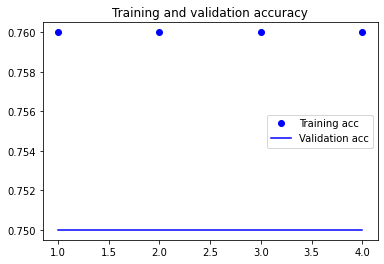

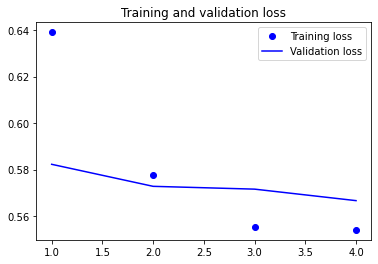

History rnn text 2:


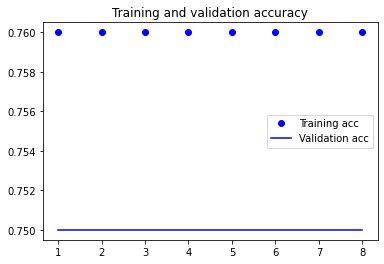

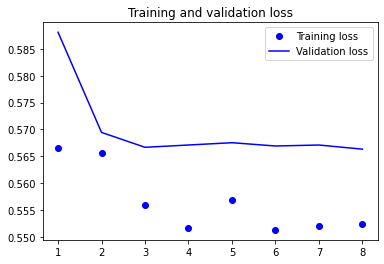

History rnn text 3:


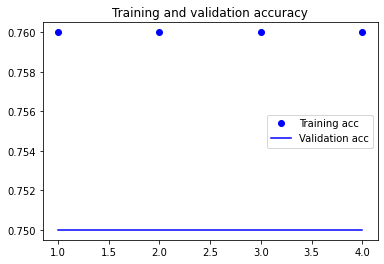

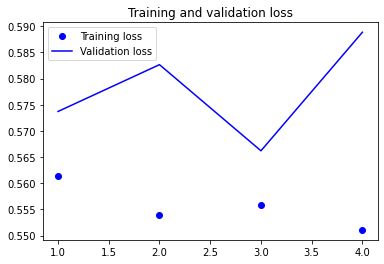

History rnn text 4:


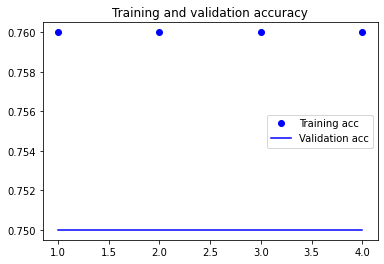

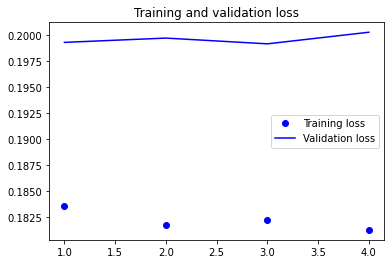


History rnn cbow 1:


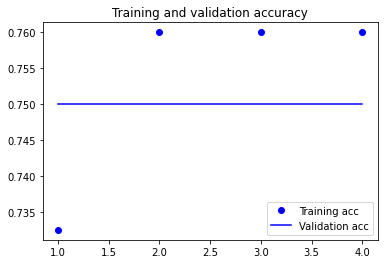

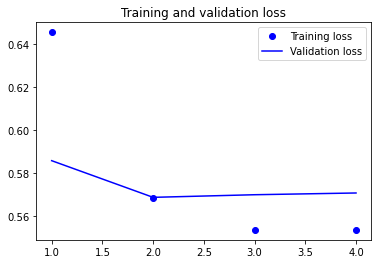

History rnn cbow 2:


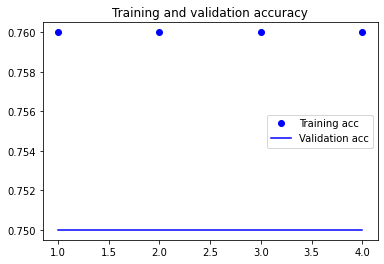

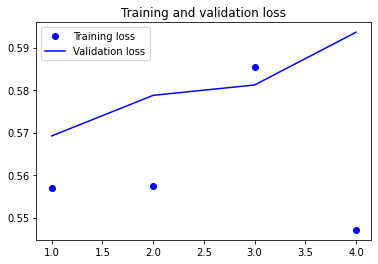

History rnn cbow 3:


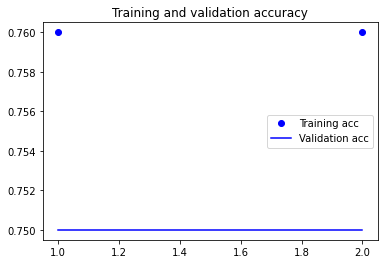

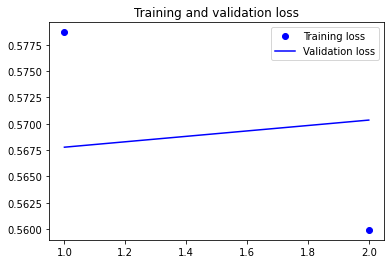

History rnn cbow 4:


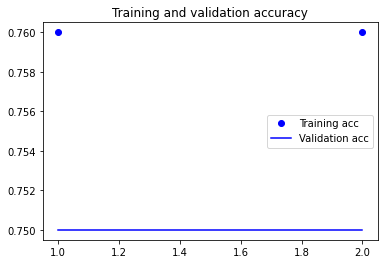

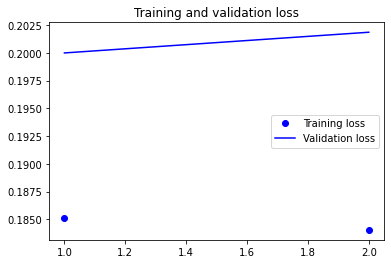

In [14]:
print('History rnn text 1:')
print_rez_rnn(history_rnn_text_1)
print('History rnn text 2:')
print_rez_rnn(history_rnn_text_2)
print('History rnn text 3:')
print_rez_rnn(history_rnn_text_3)
print('History rnn text 4:')
print_rez_rnn(history_rnn_text_4)

print('')
print('History rnn cbow 1:')
print_rez_rnn(history_rnn_cbow_1)
print('History rnn cbow 2:')
print_rez_rnn(history_rnn_cbow_2)
print('History rnn cbow 3:')
print_rez_rnn(history_rnn_cbow_3)
print('History rnn cbow 4:')
print_rez_rnn(history_rnn_cbow_4)

**Zadatak:**
    
> Izvršiti analizu svih prethodno dobivenih rezultata. Šta se može zaključiti o različitim vrijednostima parametara i reprezentacijama podataka? Detaljno objasniti sve dobivene rezultate, prikaze i tačnosti nad testnim skupovima podataka. Usporediti dvije vrste neuralnih mreža, odrediti model koji daje najveću tačnost i objasniti zašto.

- Moze se zakljuciti da za ovakve vrste problema, RNN mreze su prikladnije i  da daju bolje rezultate. Naravno kada je RNN mrezea u pitanju sporije je treniranje i potrebno je dosta vise resursa u odnosu na CNN mreze, a pogotovo za `cbow` reprezentaciju podataka u odnosu na `text`.
- Bolje rezultate su dale RNN mreze u odnosu na CNN, jer CNN mreze su namijenjene za prepoznavanja patterna u skladu vise dimenzija, dok RNN mreze su namijenjenje za prepoznavanje patterna u nekoj sekvenci vremena. Pristup modeliranju tj. NLP je pogodniji za RNN mreze, shodno time su dobijeni i bolji rezultati.